In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [10]:
max_abusers = 1

In [21]:
usage_report_names = glob('RhinoWeeklyUsageReport.*.csv')

master_df = None
for fname in usage_report_names:
    print fname
    date_str =  fname.split('.')[1]
    date_pd_obj = pd.to_datetime(date_str,format= '%Y%m%d')
    df = pd.read_csv(fname)
    df['date'] = date_pd_obj
    
    if master_df is None:
        master_df = df
    else:
        master_df = pd.concat([master_df,df], ignore_index=True)

# rt_idx = master_df.columns.index('RUNTUME (s)') 

# if rt_idx>=0:
columns = list(master_df.columns)

columns[1] = 'RUNTIME (s)'
master_df.columns=columns
        


RhinoWeeklyUsageReport.20160510.csv
RhinoWeeklyUsageReport.20160517.csv
RhinoWeeklyUsageReport.20160531.csv


In [22]:
mean_usage_df = master_df.groupby('USER').mean()

,RUNTIME (s),CPUTIME (s),MEMORY (GB),IO (GB)
USER,,,,
andrew.watrous,267767.500000,0.369500,0.000000,0.000000
anjohri,3446.000000,0.311000,0.002000,0.002000
cweidema,16976087.000000,18363367.900000,71389109.380667,145608.307667
elliot.smith,21.000000,0.067000,0.000000,0.000000
esolo,52097040.000000,35793635.352000,74117475.952000,95839.232000
healeym,5293.000000,0.383500,0.004000,0.005000
jfm2,317054.000000,6.896667,0.105333,0.090333
jgermi,13671.500000,13208.225500,49414.745000,4.204000
jkragel,578289.666667,3.007000,0.039667,0.033333


In [27]:
cpu_abusers  = mean_usage_df['CPUTIME (s)'].sort_values( ascending=False)
runtime_abusers = mean_usage_df['RUNTIME (s)'].sort_values(ascending=False)
memory_abusers = mean_usage_df['MEMORY (GB)'].sort_values(ascending=False)
io_abusers = mean_usage_df['IO (GB)'].sort_values( ascending=False)

In [29]:
runtime_abusers.index

Index([u'esolo', u'tungphan', u'cweidema', u'sudas', u'timothy.sheehan',
       u'jkragel', u'yezzyat', u'uma.mohan', u'jfm2', u'andrew.watrous',
       u'jostein', u'salman.qasim', u'niclong', u'lyj', u'maint', u'jgermi',
       u'malika.datta', u'mswat', u'healeym', u'ks347', u'anjohri',
       u'peter.horak', u'maolson', u'ramayya', u'elliot.smith'],
      dtype='object', name=u'USER')

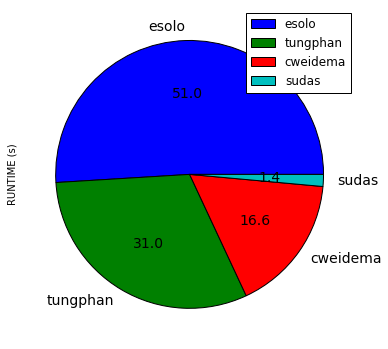

In [40]:
runtime_abusers[:4].plot.pie(autopct='%.1f', fontsize=14, figsize=(6, 6), legend=True)

# rt = runtime_abusers[:max_abusers]

# labels = rt.index
# sizes = rt.values
# # colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# # explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# plt.pie(sizes, 
# #         explode=explode, 
#         labels=labels, 
# #         colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=90)
# # Set aspect ratio to be equal so that pie is drawn as a circle.
# plt.axis('equal')
# plt.legend()

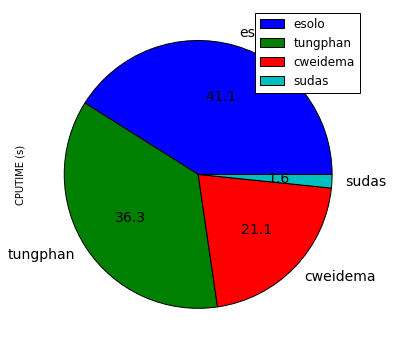

In [41]:
cpu_abusers[:4].plot.pie(autopct='%.1f', fontsize=14, figsize=(6, 6), legend=True)

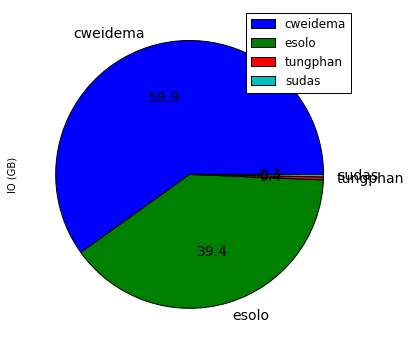

In [42]:
io_abusers[:4].plot.pie(autopct='%.1f', fontsize=14, figsize=(6, 6), legend=True)

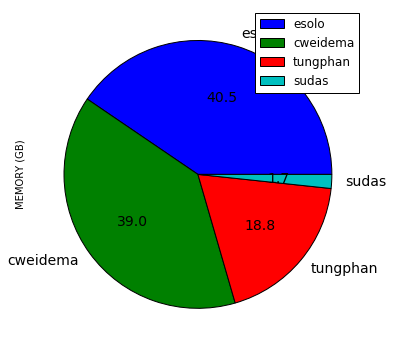

In [43]:
memory_abusers[:4].plot.pie(autopct='%.1f', fontsize=14, figsize=(6, 6), legend=True)

In [4]:
df = pd.read_csv('RhinoWeeklyUsageReport.20160531.csv')
df

,USER,RUNTUME (s),CPUTIME (s),MEMORY (GB),IO (GB)
0,andrew.watrous,189653,0.615,0.000,0.000
1,cweidema,29297468,28731995.393,93101107.461,253727.014
2,esolo,52097040,35793635.352,74117475.952,95839.232
3,healeym,10583,0.727,0.008,0.010
4,jfm2,686265,9.750,0.139,0.122
5,jgermi,747,114.050,302.691,0.101
6,jkragel,475316,2.005,0.023,0.021
7,jostein,1312,0.057,0.000,0.000
8,lyj,7247,0.036,0.000,0.000
9,maint,24510,0.206,0.002,0.002


In [6]:
dt = 20160531
pd.to_datetime(dt,format= '%Y%m%d')

Timestamp('2016-05-31 00:00:00')

In [7]:
df['date']=dt

In [8]:
df

,USER,RUNTUME (s),CPUTIME (s),MEMORY (GB),IO (GB),date
0,andrew.watrous,189653,0.615,0.000,0.000,20160531
1,cweidema,29297468,28731995.393,93101107.461,253727.014,20160531
2,esolo,52097040,35793635.352,74117475.952,95839.232,20160531
3,healeym,10583,0.727,0.008,0.010,20160531
4,jfm2,686265,9.750,0.139,0.122,20160531
5,jgermi,747,114.050,302.691,0.101,20160531
6,jkragel,475316,2.005,0.023,0.021,20160531
7,jostein,1312,0.057,0.000,0.000,20160531
8,lyj,7247,0.036,0.000,0.000,20160531
9,maint,24510,0.206,0.002,0.002,20160531
